In [57]:
import numpy as  np 
import pandas as  pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

,Unnamed: 0,Date,Product,Category,Sales
0,0,2021-06-22,Pixelophone_XL,Pixel,59.0
1,1,2021-06-23,Pixelophone_XL,Pixel,123.0
2,2,2021-06-24,Pixelophone_XL,Pixel,105.0
3,3,2021-06-25,Pixelophone_XL,Pixel,0.0
4,4,2021-06-26,Pixelophone_XL,Pixel,60.0
...,...,...,...,...,...
7202,632,2023-07-08,GalaxyBuds_Pro,Galaxy,182.0
7203,633,2023-07-09,GalaxyBuds_Pro,Galaxy,116.0
7204,634,2023-07-10,GalaxyBuds_Pro,Galaxy,247.0
7205,635,2023-07-11,GalaxyBuds_Pro,Galaxy,112.0


# Satisfaction driver analysis for a amusement park

The following analysis is based on an example provided by R for Marketing Research and Analytics (2015). The data allows for a set of analyses to demonstrate satisfaction driver analysis A standard protocol within marketing analytics to investigate the relationships between potential drivers of customer satisfaction. Specifcally in this exaxmple the stakeholdweer9Mananger of amusement part wants specific things he can do to drive customer satisfaction more.

In [6]:
df = pd.read_csv("http://goo.gl/HKnl74")
df.head(2)

,weekend,num.child,distance,rides,games,wait,clean,overall
0,yes,0,114.648259,87,73,60,89,47
1,yes,2,27.014097,87,78,76,87,65


In [19]:
# Desritive statistics of the Marketing data.
print(df.describe())

# Data transformation to make the distance varaible normallly distributed on the log scale.
df['logdist'] = np.log(df['distance'])

        num.child    distance      rides       games        wait       clean  \
count  500.000000  500.000000  500.00000  500.000000  500.000000  500.000000   
mean     1.738000   31.047509   85.84600   78.666000   69.896000   87.898000   
std      1.495938   33.145445    5.46278    8.123202   10.770757    5.115068   
min      0.000000    0.526723   72.00000   57.000000   40.000000   74.000000   
25%      0.000000   10.318091   82.00000   73.000000   62.000000   84.000000   
50%      2.000000   19.019093   86.00000   78.000000   70.000000   88.000000   
75%      3.000000   39.582050   90.00000   85.000000   77.000000   91.000000   
max      5.000000  239.192134  100.00000  100.000000  100.000000  100.000000   

          overall     logdist  
count  500.000000  500.000000  
mean    51.258000    2.978242  
std     15.878655    0.985992  
min      6.000000   -0.641081  
25%     40.000000    2.333878  
50%     50.000000    2.945439  
75%     62.000000    3.678373  
max    100.000000    5.

## Pairs plot

Asscess visually potential associations between all variables.

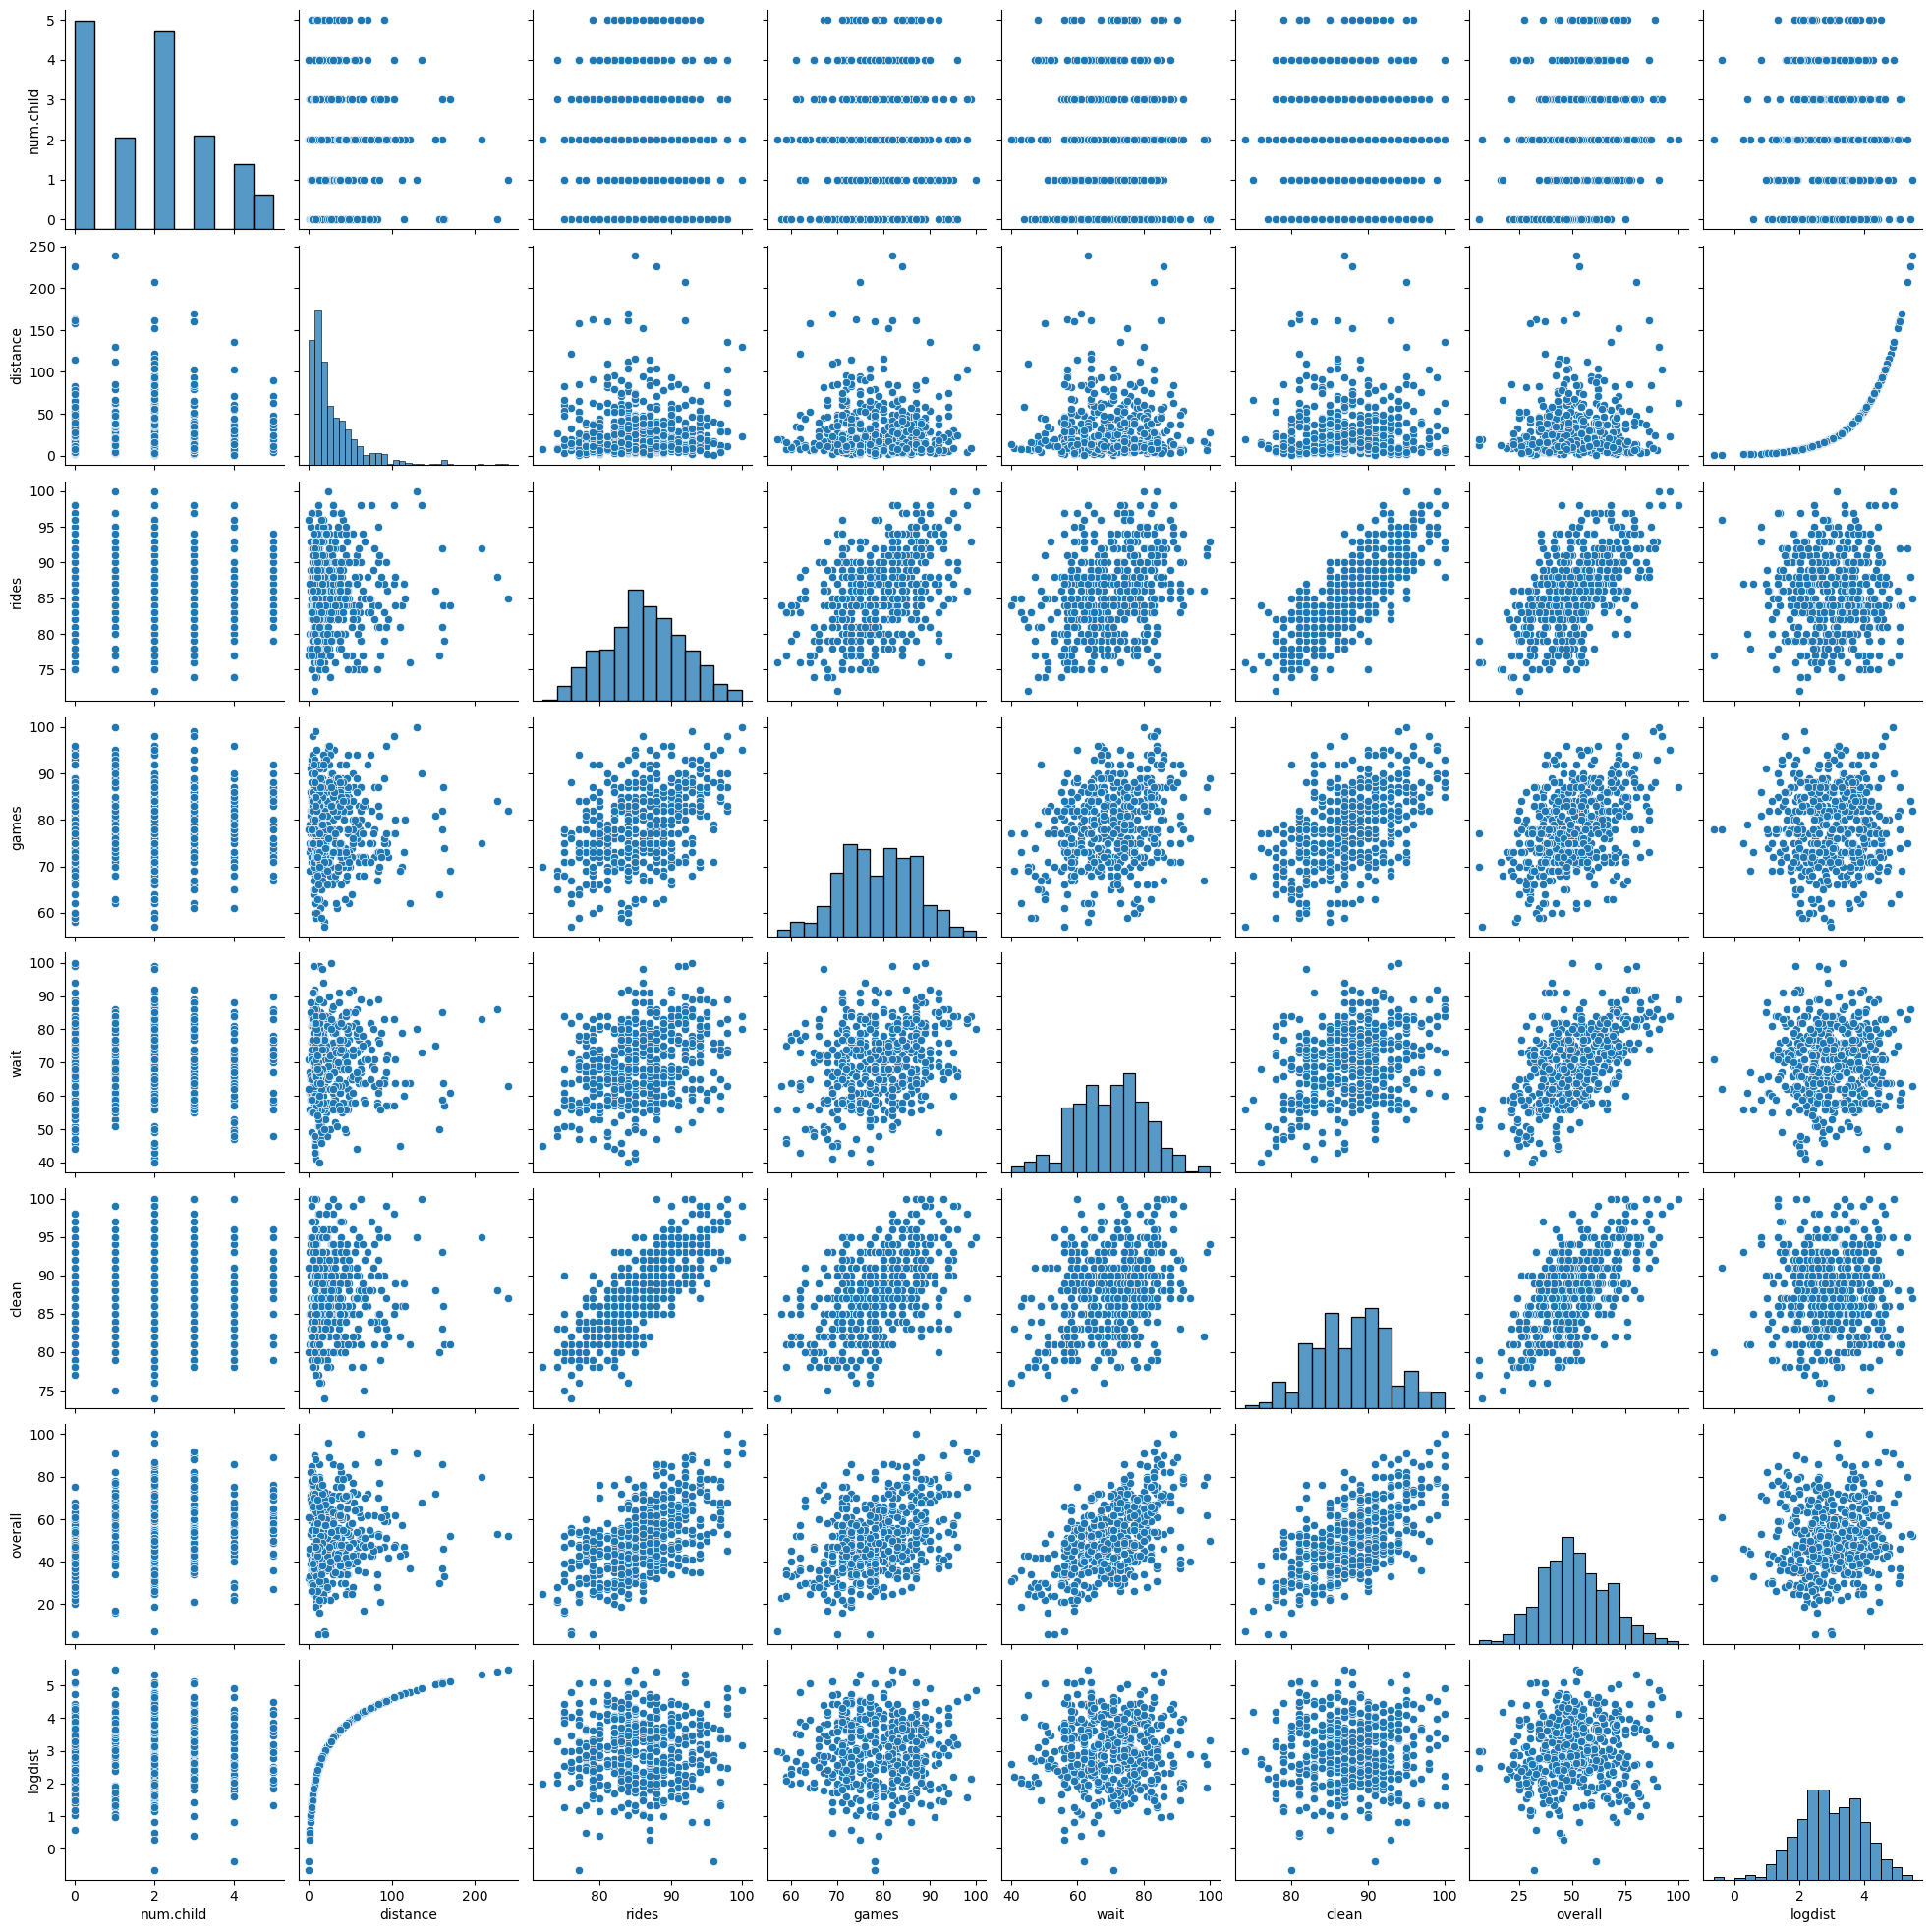

In [28]:
# Plot all varibles in pandas dataframe.
sns.pairplot(df);

<Axes: >

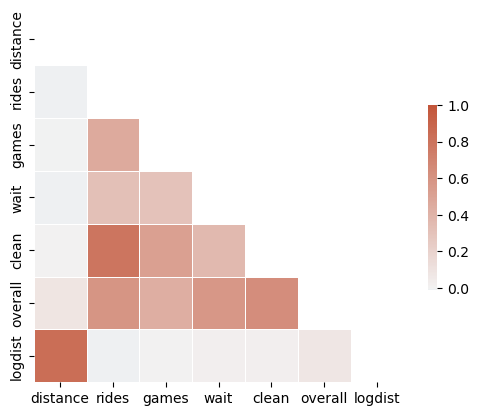

In [54]:
# Calculate parametric (Pearsons) correlations.
# Drop categorical and non-normally distrbuted variables
dfCorr = df.drop(['weekend', 'num.child'], axis=1)
pearson = dfCorr.corr('pearson')

# Generate a mask for the upper triangle
maskP = np.triu(np.ones_like(pearson, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap for Pearson correlation results.
sns.heatmap(pearson, mask=maskP, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Model data

In [55]:
# Fit Linear regression model.
rides = sm.add_constant(df.rides)
overall = df.overall

model = sm.OLS(overall, rides)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     260.4
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.97e-47
Time:                        15:44:47   Log-Likelihood:                -1986.3
No. Observations:                 500   AIC:                             3977.
Df Residuals:                     498   BIC:                             3985.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.9622      9.079    -10.460      0.0

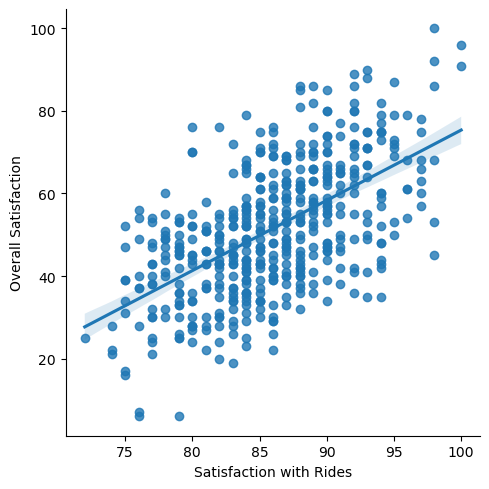

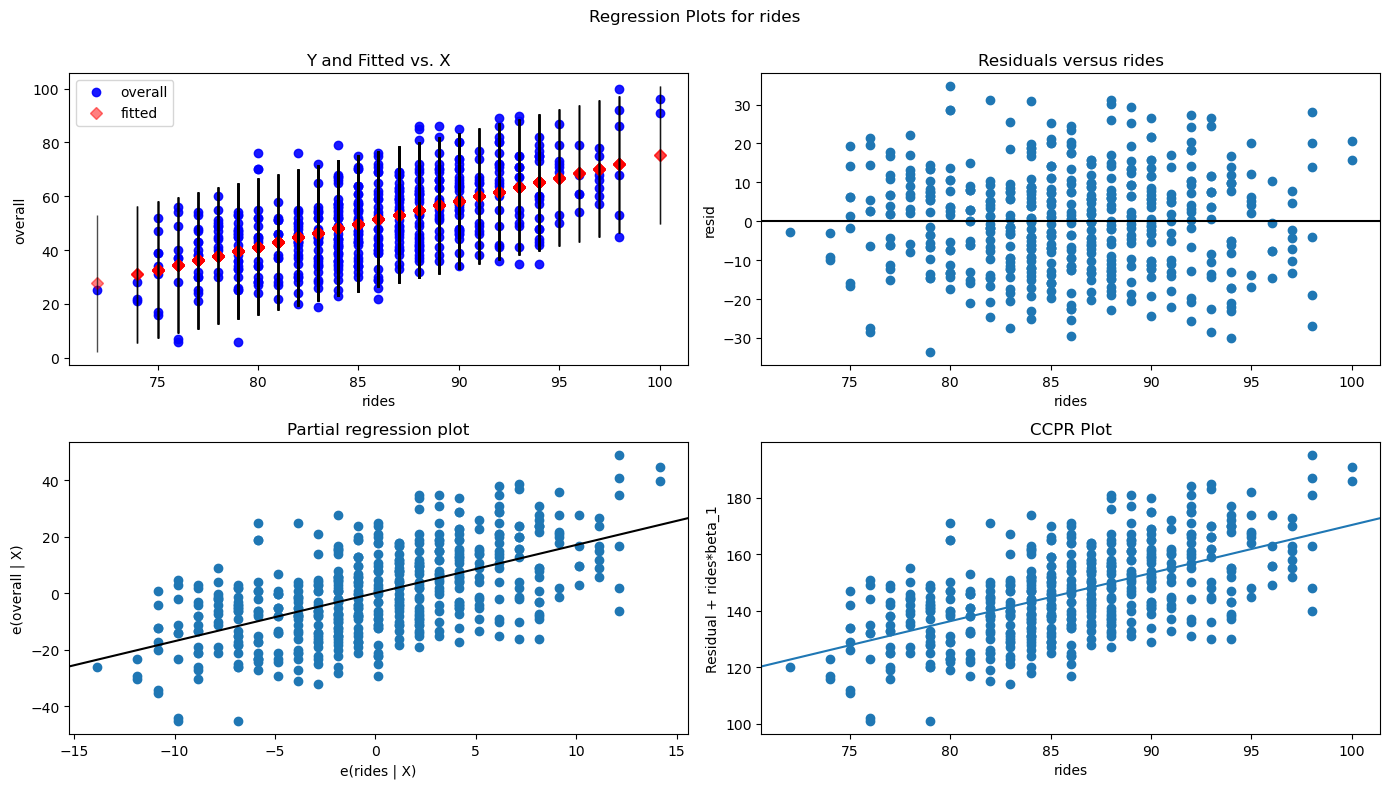

In [45]:
# Plot Linear regression model.
sns.lmplot(x = 'rides', y = 'overall', data=df) 
plt.xlabel('Satisfaction with Rides');
plt.ylabel('Overall Satisfaction');

# Plot residual plot.
fig = plt.figure(figsize=(14, 8)) 
residplot = sm.graphics.plot_regress_exog(results, 'rides',fig=fig)